# SRGAN Project

Проект расположен в репозитории: https://github.com/dvarkless/InnopolisDS/tree/main/MultiSRGAN

Классы Trainer, ModelTester, PlotProcessor и архитектуру модели можно посмотреть там.

В данном ноутбуке представлен пример обучения и проверки модели.

## Imports

In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import shutup
import torch
from model_tester import ModelTester
from statistics_utils import PlotProcessor
from train import Trainer
from PIL import Image

%matplotlib inline
shutup.please()

### Указываем путь к директории с датасетом

In [ ]:
train_dir = Path('data/compressed_max_full_hd/DIV2K_train_LR_bicubic/')
eval_dir = Path('data/compressed_max_full_hd/DIV2K_valid_LR_bicubic/')

## Обучение модели SRGAN

для примера обучим только 30 эпох

In [ ]:
gen_optimizer = torch.optim.Adam
disc_optimizer = torch.optim.Adam
gen_optimizer_params = {'lr': 2e-4}
disc_optimizer_params = {'lr': 7e-6}
loss_coeffs = (1, 0.011, 0.005)
trainer = Trainer(crop_size=100, epochs=30, gen_optimizer=gen_optimizer,
                  disc_optimizer=disc_optimizer,
                  gen_optimizer_params=gen_optimizer_params,
                  disc_optimizer_params=disc_optimizer_params,
                  save_interval=25, colab=False)
trainer.fit(train_dir, eval_dir, batch_size=48,
            data_augmentation_type='photo',
            model_tag='srgan', save_g_as='generator_srgan',
            save_d_as='discriminator_srgan')

on 0: ============= 1/30 =============
on 0: Training losses: Generator: 0.0742, Discriminator: 1.3900
on 0: Generator score:     (0.534)
on 0: Discriminator score: (0.536)
on 0: Separate losses:
on 0: Image loss = 0.473; Adversarial loss = 0.107; Perception loss = 0.682
on 0: Evaluation results:
on 0: mse = 0.0315
on 0: psnr = 15.3298
on 0: ssim = 0.3864
on 1: ============= 2/30 =============
on 1: Training losses: Generator: 0.0567, Discriminator: 1.3822
on 1: Generator score:     (0.515)
on 1: Discriminator score: (0.518)
on 1: Separate losses:
on 1: Image loss = 0.226; Adversarial loss = 0.113; Perception loss = 0.625
on 1: Evaluation results:
on 1: mse = 0.0112
on 1: psnr = 20.2658
on 1: ssim = 0.5151
on 2: ============= 3/30 =============
on 2: Training losses: Generator: 0.0536, Discriminator: 1.3723
on 2: Generator score:     (0.498)
on 2: Discriminator score: (0.506)
on 2: Separate losses:
on 2: Image loss = 0.188; Adversarial loss = 0.119; Perception loss = 0.604
on 2: Evalua

## Использование модели на изображениях

Указываем путь с директорией с изображениями и моделью, сохраняем результат работы в test_output

In [ ]:
model_path = Path('models/favorites/SRGAN/SRGAN-photo-250.pt')
image_dir = Path('test_input/images/')
tester = ModelTester(model_path, model_tag='SRGAN')
for image_path in image_dir.iterdir():
    if image_path.is_dir():
        for image in image_path.iterdir():
            tester.run_on_image(hr_image=image)
    else:
        tester.run_on_image(hr_image=image_path)

## Использование модели на видео

Также можно протестировать работу на видео, звук на обработанное видео накладывается на линуксе с помощью утилиты ffmpeg

In [ ]:
model_path = Path('models/favorites/SRGAN/SRGAN-photo-250.pt')
video_dir = Path('test_input/videos')

tester = ModelTester(model_path, model_tag='SRGAN')
for video_path in video_dir.iterdir():
    if video_path.is_dir():
        for video in video_path.iterdir():
            tester.run_on_video(video, 'upscale')
    else:
        tester.run_on_video(video_path, 'upscale')

MoviePy - Writing audio in test_output/temp_audio.wav


MoviePy - Done.


|                                        | ▁▃▅ 0/261 [0%] in 0s (0.0/s, eta: -)                                         
|                                        | ▂▄▆ 0/261 [0%] in 0s (0.0/s, eta: -)                                         
|                                        | ▃▅▇ 0/261 [0%] in 0s (0.0/s, eta: -)                                         
|                                        | ▄▆█ 0/261 [0%] in 0s (0.0/s, eta: -)                                         
|▏                                       | ▅▇▇ 1/261 [0%] in 0s (2.3/s, eta: 1:51)                                      
|▎                                       | ▆█▆ 2/261 [1%] in 1s (3.5/s, eta: 1:32)                                      
|▌                                       | ▇▇▅ 3/261 [1%] in 1s (4.3/s, eta: 1:16)                                      
|▋                                       | █▆▄ 4/261 [2%] in 1s (5.0/s, eta: 1:04)                                      
|▊                              

ffmpeg version n5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 -

MoviePy - Writing audio in test_output/temp_audio.wav


MoviePy - Done.


|                                        | ▁▃▅ 0/306 [0%] in 0s (0.0/s, eta: -)                                         
|                                        | ▂▄▆ 0/306 [0%] in 0s (0.0/s, eta: -)                                         
|▏                                       | ▃▅▇ 1/306 [0%] in 0s (4.9/s, eta: 1:02)                                      
|▏                                       | ▄▆█ 1/306 [0%] in 0s (3.2/s, eta: 1:02)                                      
|▎                                       | ▅▇▇ 2/306 [1%] in 0s (4.5/s, eta: 1:05)                                      
|▍                                       | ▆█▆ 3/306 [1%] in 1s (5.4/s, eta: 1:00)                                      
|▌                                       | ▇▇▅ 4/306 [1%] in 1s (6.1/s, eta: 55s)                                       
|▌                                       | █▆▄ 4/306 [1%] in 1s (5.3/s, eta: 55s)                                       
|▋                              

ffmpeg version n5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 12.2.0 (GCC)
  configuration: --prefix=/usr --disable-debug --disable-static --disable-stripping --enable-amf --enable-avisynth --enable-cuda-llvm --enable-lto --enable-fontconfig --enable-gmp --enable-gnutls --enable-gpl --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libdav1d --enable-libdrm --enable-libfreetype --enable-libfribidi --enable-libgsm --enable-libiec61883 --enable-libjack --enable-libmfx --enable-libmodplug --enable-libmp3lame --enable-libopencore_amrnb --enable-libopencore_amrwb --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librav1e --enable-librsvg --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libv4l2 --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxcb --enable-libxml2 -

## Вывод графиков метрик обучения

In [ ]:
stats_path = Path('statistics/SRGAN.csv')
plt = PlotProcessor(stats_path)

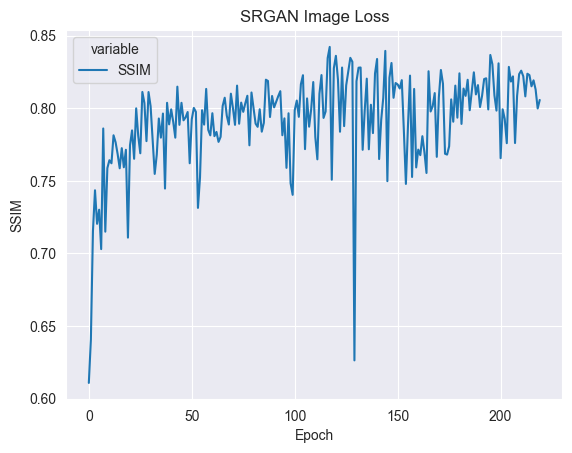

In [ ]:
plt.show_image_score(markers=True, title='SRGAN Image Loss')

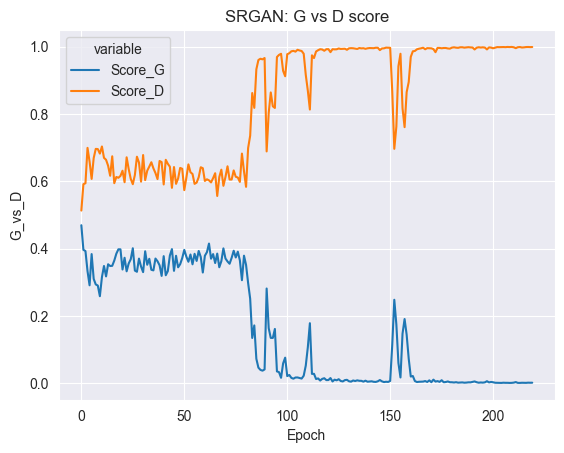

In [ ]:
plt.show_gan_score(markers=True, title='SRGAN: G vs D score')

### Метрики на последней эпохе обучения

In [ ]:
vals = plt.get_last_vals()
mse = 1/(10**(vals["PSNR"]/10)*0.9)
print(stats_path.stem)
print(f'MSE = {mse:.4f}')
print(f'PSNR = {vals["PSNR"]:.3f}db')
print(f'SSIM = {vals["SSIM"]:.3f}')
print(f'Generator score = ({vals["Score_G"]:.3f})')
print(f'Discriminator score = ({vals["Score_D"]:.3f})')

SRGAN
MSE = 0.0021
PSNR = 27.223db
SSIM = 0.806
Generator score = (0.001)
Discriminator score = (0.999)
